In [43]:
import pandas as pd

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
path = '/content/sample_data/municipality_bus_utilization.csv'
raw_csv_data = pd.read_csv(path)
df_bus_permanent = raw_csv_data.copy()

In [46]:
df_bus_permanent.timestamp = pd.to_datetime(df_bus_permanent.timestamp)
df_bus_permanent["timestamp"] = df_bus_permanent["timestamp"].dt.strftime('%Y-%m-%d %H')
df_bus_permanent.timestamp = pd.to_datetime(df_bus_permanent.timestamp)
df_bus_new=df_bus_permanent.groupby(['timestamp','municipality_id','total_capacity']).max('usage')
df_bus=df_bus_new.sort_values(['municipality_id','timestamp']).reset_index()
df_bus.head(10)

,timestamp,municipality_id,total_capacity,usage
0,2017-06-04 07:00:00,0,2813,204
1,2017-06-04 08:00:00,0,2813,332
2,2017-06-04 09:00:00,0,2813,485
3,2017-06-04 10:00:00,0,2813,583
4,2017-06-04 11:00:00,0,2813,614
5,2017-06-04 12:00:00,0,2813,613
6,2017-06-04 13:00:00,0,2813,605
7,2017-06-04 14:00:00,0,2813,585
8,2017-06-04 15:00:00,0,2813,520
9,2017-06-04 16:00:00,0,2813,470


In [47]:
df_bus.isna().sum()

timestamp          0
municipality_id    0
total_capacity     0
usage              0
dtype: int64

[0 1 2 3 4 5 6 7 8 9]


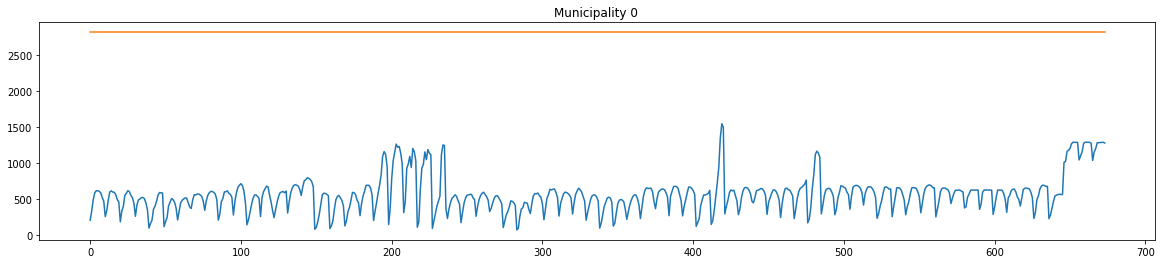

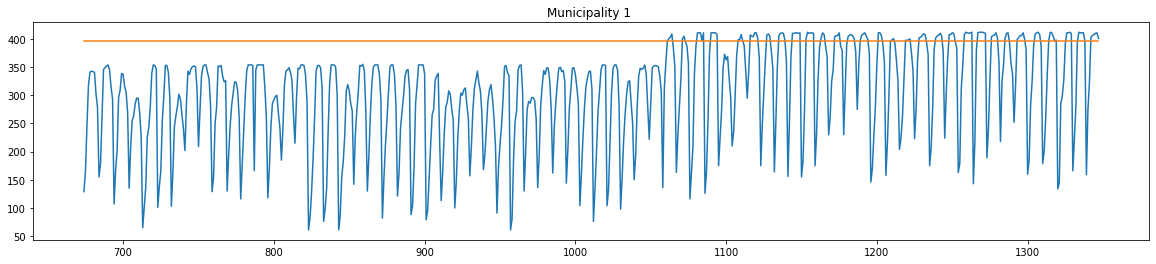

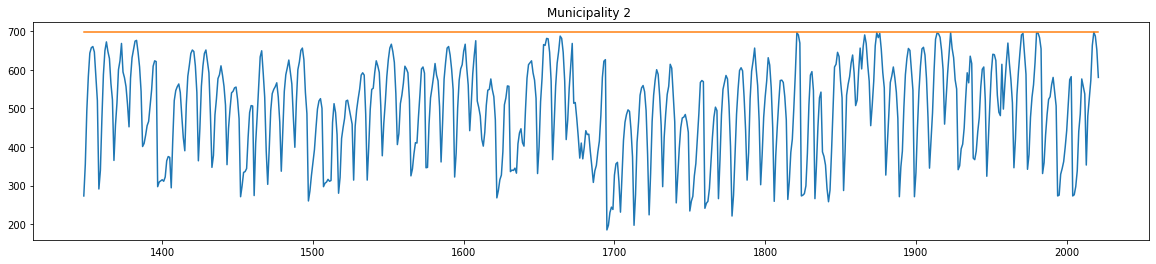

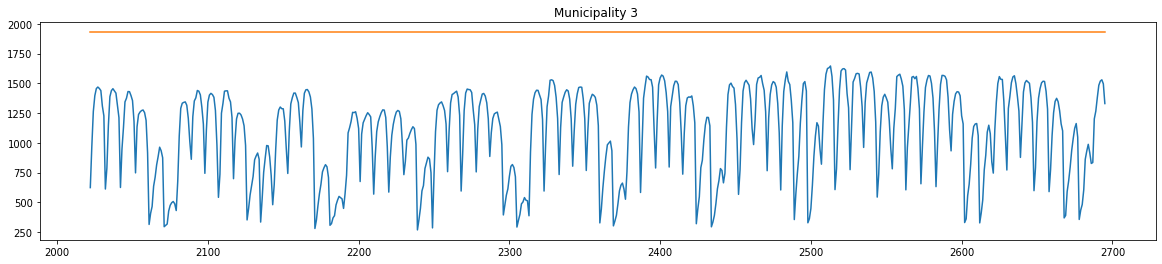

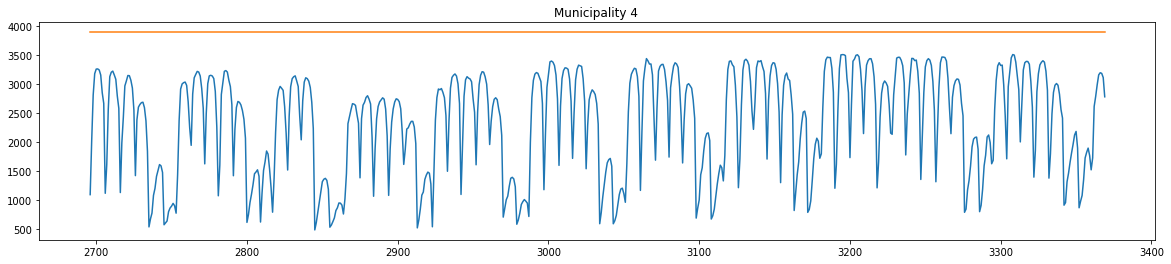

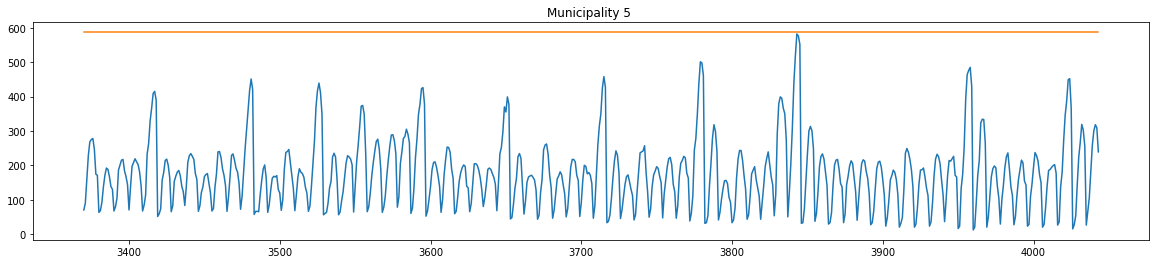

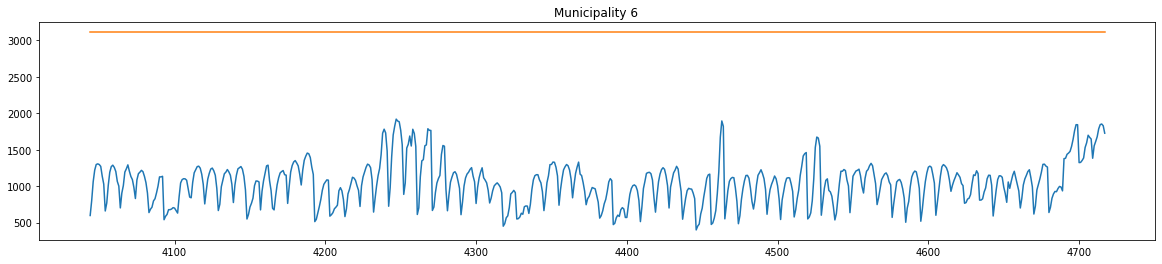

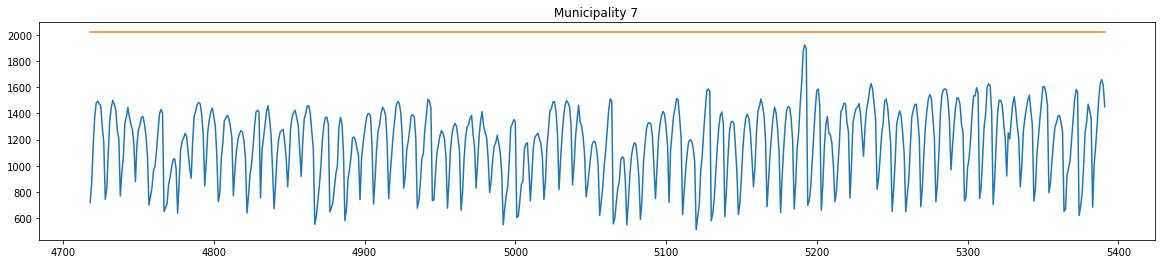

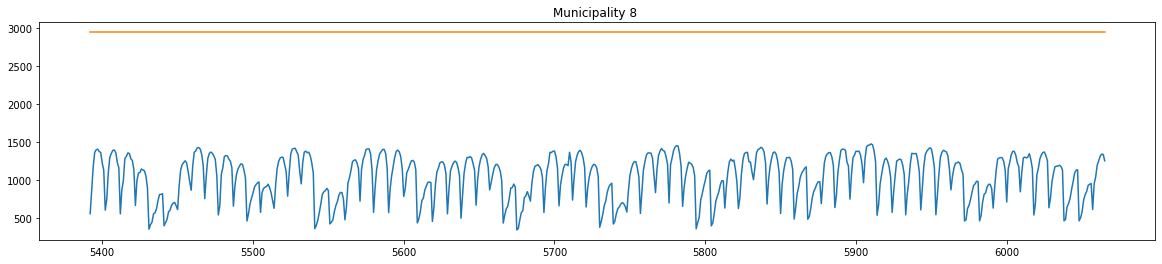

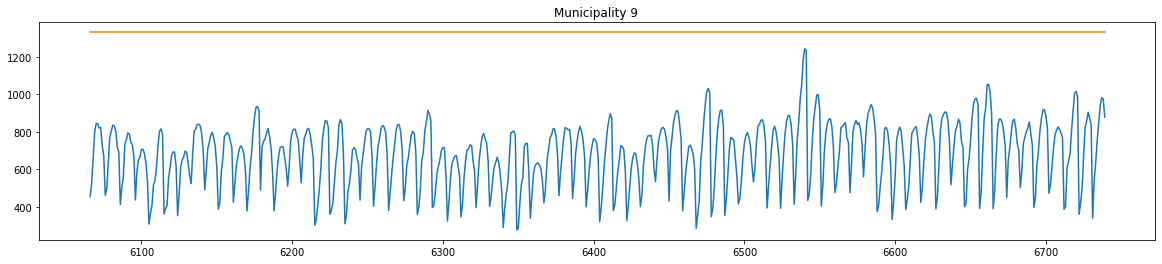

In [50]:
import matplotlib.pyplot as plt
municipality_list = df_bus['municipality_id'].unique()
print(municipality_list)
for i in municipality_list:
 df_bus.loc[df_bus['municipality_id']==i].usage.plot(figsize=(20,4),title="Municipality %s "%i)
 df_bus.loc[df_bus['municipality_id']==i].total_capacity.plot(figsize=(20,4))
 plt.show()

In [ ]:
#without filling the n/a values
"""dataframe_dictionary = {}
for x in municipality_list:
  dataframe_dictionary["municipality-{0}".format(x)] = df_bus[df_bus['municipality_id']==x].asfreq(freq='h')
  dataframe_dictionary["municipality-{0}".format(x)].drop(dataframe_dictionary["municipality-{0}".format(x)][(dataframe_dictionary["municipality-{0}".format(x)].index.hour > 16) | (dataframe_dictionary["municipality-{0}".format(x)].index.hour < 7) ].index,axis=0)
  """

In [ ]:
"""for x in municipality_list:
  print("municipality",x,"\n",dataframe_dictionary["municipality-{0}".format(x)].isna().sum(),"\n")
  """

In [52]:
#df_bus.set_index('timestamp',inplace=True)
dataframe_dictionary = {}
for x in municipality_list:
  dataframe_dictionary["municipality-{0}".format(x)] = df_bus[df_bus['municipality_id']==x].asfreq(freq='h',method='ffill')
  dataframe_dictionary["municipality-{0}".format(x)].drop(dataframe_dictionary["municipality-{0}".format(x)][(dataframe_dictionary["municipality-{0}".format(x)].index.hour > 16) | (dataframe_dictionary["municipality-{0}".format(x)].index.hour < 7) ].index,inplace=True)


In [54]:
len(dataframe_dictionary["municipality-0"]) #77 günlük veri tutulmakta

770

In [55]:
for x in municipality_list:
  print("municipality",x,"\n",dataframe_dictionary["municipality-{0}".format(x)].isna().sum(),"\n")

municipality 0 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 1 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 2 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 3 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 4 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 5 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 6 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 7 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 8 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 

municipality 9 
 municipality_id    0
total_capacity     0
usage              0
dtype: int64 



In [57]:
#checking the stationarity for each municiplality dataset
from statsmodels.tsa.stattools import adfuller
for x in municipality_list:
  print("****MUNICIPALITY ",x,"*****")
  X=dataframe_dictionary["municipality-{0}".format(x)].usage.values
  result = adfuller(X)
  print("ADF Statistic: ",result[0])
  print("P value: ",result[1])
  print("Number of Lag ",result[2])
  print("Critical values: ")
  for key,value in result[4].items():
    print("\t %s  %.3f" % (key,value))
  if result[0] < result[4]["5%"]:
    print("Time series is stationary for municipality ",x)
  else:
    print("\033[1m\033[91mTime series is NOT stationary for municipality\033[0m",x)
  print("---------\n")

****MUNICIPALITY  0 *****
ADF Statistic:  -2.096979458861148
P value:  0.24573090967431144
Number of Lag  20
Critical values: 
	 1%  -3.439
	 5%  -2.865
	 10%  -2.569
Time series is NOT stationary for municipality 0
---------

****MUNICIPALITY  1 *****
ADF Statistic:  -1.9414675574886506
P value:  0.3128118089875218
Number of Lag  20
Critical values: 
	 1%  -3.439
	 5%  -2.865
	 10%  -2.569
Time series is NOT stationary for municipality 1
---------

****MUNICIPALITY  2 *****
ADF Statistic:  -4.841626477488923
P value:  4.524424300849083e-05
Number of Lag  20
Critical values: 
	 1%  -3.439
	 5%  -2.865
	 10%  -2.569
Time series is stationary for municipality  2
---------

****MUNICIPALITY  3 *****
ADF Statistic:  -6.90517027391262
P value:  1.252629728000824e-09
Number of Lag  20
Critical values: 
	 1%  -3.439
	 5%  -2.865
	 10%  -2.569
Time series is stationary for municipality  3
---------

****MUNICIPALITY  4 *****
ADF Statistic:  -7.35621617203091
P value:  9.764914211868261e-11
Num

In [59]:
"""
import numpy as np
dataframe_dictionary["municipality-1"]= np.log(dataframe_dictionary["municipality-1"])
dataframe_dictionary["municipality-1"]=dataframe_dictionary["municipality-1"]-dataframe_dictionary["municipality-1"].shift()
dataframe_dictionary["municipality-1"].dropna(inplace=True)
"""
"""import numpy as np
df_1_log = np.log(dataframe_dictionary["municipality-1"])
rolling_mean = df_1_log.rolling(window=10).mean()
dataframe_dictionary["municipality-1"] = df_1_log-rolling_mean
dataframe_dictionary["municipality-1"].dropna(inplace=True)"""

dataframe_dictionary["municipality-0"]["new_usage"] = dataframe_dictionary["municipality-0"].usage - dataframe_dictionary["municipality-0"].usage.shift(10)
dataframe_dictionary["municipality-1"]["new_usage"] = dataframe_dictionary["municipality-1"].usage - dataframe_dictionary["municipality-1"].usage.shift(10)
dataframe_dictionary["municipality-0"]= dataframe_dictionary["municipality-0"].dropna()
dataframe_dictionary["municipality-1"]= dataframe_dictionary["municipality-1"].dropna()

print(dataframe_dictionary["municipality-1"])


for x in [0,1]:
  print("****MUNICIPALITY ",x,"*****")
  X=dataframe_dictionary["municipality-{0}".format(x)]["new_usage"].values
  result2 = adfuller(X)
  print("ADF Statistic: ",result2[0])
  print("P value: ",result[1])
  print("Number of Lag ",result2[2])
  print("Critical values: ")
  for key,value in result[4].items():
    print("\t %s  %.3f" % (key,value))
  if result2[0] < result2[4]["5%"]:
    print("Time series is stationary for municipality ",x)
  else:
    print("\033[1m\033[91mTime series is NOT stationary for municipality\033[0m",x)
  print("---------\n")



                     municipality_id  total_capacity  usage  new_usage
timestamp                                                             
2017-06-05 07:00:00                1             397    155       26.0
2017-06-05 08:00:00                1             397    178       14.0
2017-06-05 09:00:00                1             397    265       20.0
2017-06-05 10:00:00                1             397    346       29.0
2017-06-05 11:00:00                1             397    349        8.0
...                              ...             ...    ...        ...
2017-08-19 12:00:00                1             397    406       -6.0
2017-08-19 13:00:00                1             397    408       -3.0
2017-08-19 14:00:00                1             397    410       -1.0
2017-08-19 15:00:00                1             397    411        0.0
2017-08-19 16:00:00                1             397    401        4.0

[760 rows x 4 columns]
****MUNICIPALITY  0 *****
ADF Statistic:  -5.70112369

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

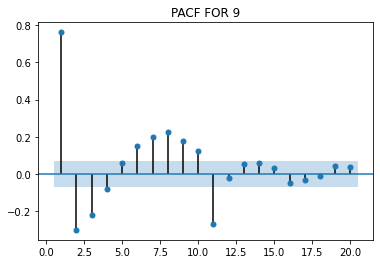

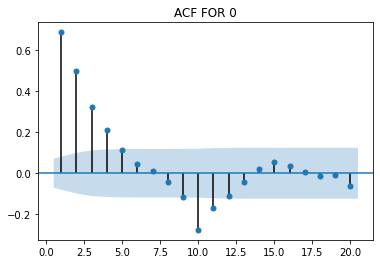

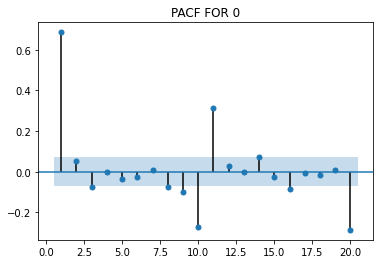

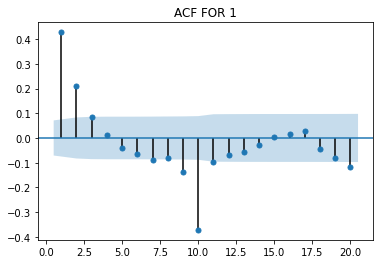

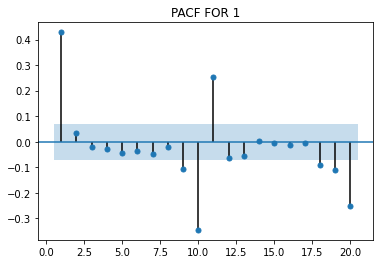

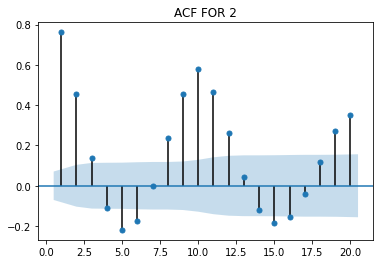

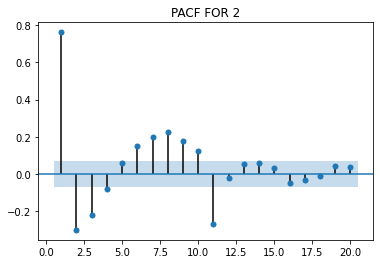

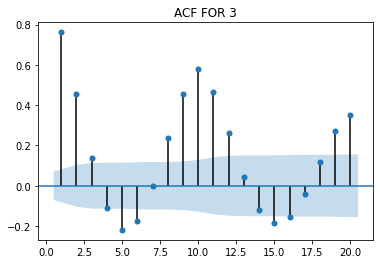

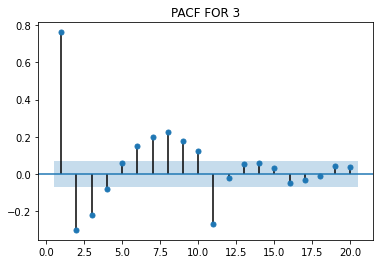

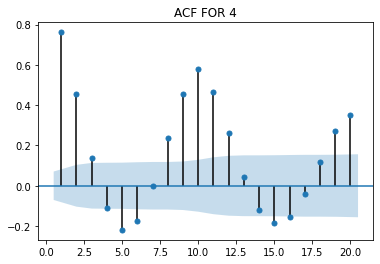

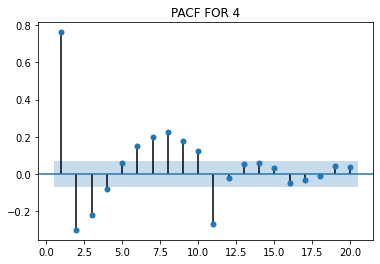

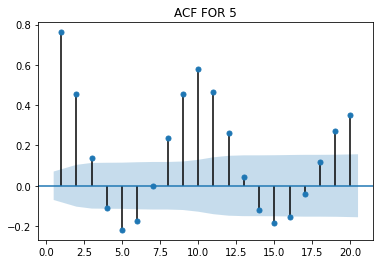

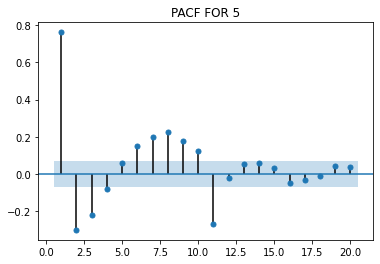

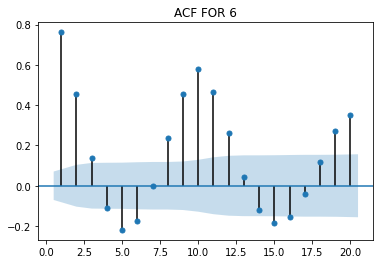

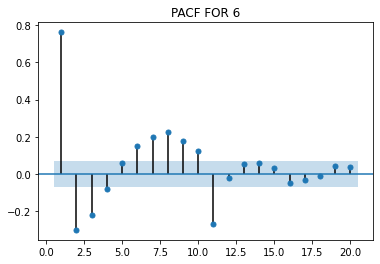

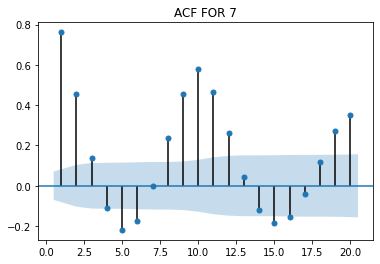

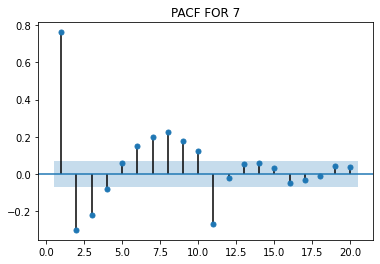

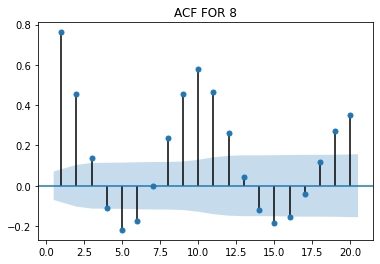

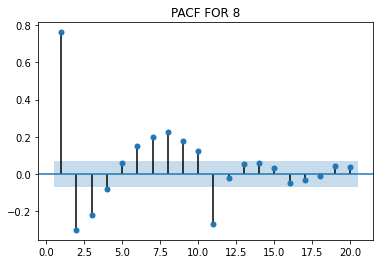

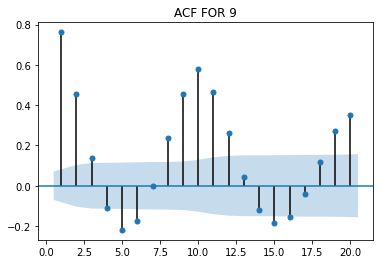

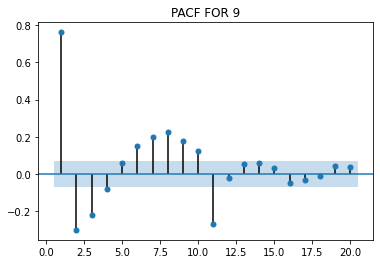

In [60]:
plot_acf(dataframe_dictionary["municipality-0"]["new_usage"],lags=20,zero=False,title="ACF FOR 0") #d=1 #p = 10 #q=10
plot_pacf(dataframe_dictionary["municipality-0"]["new_usage"],lags = 20,zero=False,title="PACF FOR 0") 

plot_acf(dataframe_dictionary["municipality-1"]["new_usage"],lags=20,zero=False,title="ACF FOR 1") #d=1 p=10 q=10
plot_pacf(dataframe_dictionary["municipality-1"]["new_usage"],lags =20,zero=False,title="PACF FOR 1") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 2")  #q =11 p=10 d=0
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 2") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 3") #p = 10 q=2 d=0
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 3") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 4") #p= 10 q=2 d=0
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 4") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 5") #p= 10 q=2 d=0
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 5") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 6") #p= 10 q=2 d=0
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 6") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 7") #p= 10 q=2 d=0
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 7") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 8") #p= 10 q=2 d=0
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 8") 

plot_acf(dataframe_dictionary["municipality-2"].usage,lags=20,zero=False,title="ACF FOR 9") 
plot_pacf(dataframe_dictionary["municipality-2"].usage,lags = 20,zero=False,title="PACF FOR 9") #p= 10 q=2 d=0 


In [62]:
for x in municipality_list:
  del dataframe_dictionary["municipality-{0}".format(x)]['municipality_id']
  del dataframe_dictionary["municipality-{0}".format(x)]['total_capacity']

In [81]:
train_dictionary={}
test_dictionary={}
for x in municipality_list:
  train_dictionary[x]=dataframe_dictionary["municipality-{0}".format(x)]['2017-06-04 07:00:00':'2017-08-04 16:00:00']
  test_dictionary[x]=dataframe_dictionary["municipality-{0}".format(x)]['2017-08-05 07:00:00':'2017-08-19 16:00:00']
  


timestamp
2017-08-04 12:00:00    625
2017-08-04 13:00:00    625
2017-08-04 14:00:00    625
2017-08-04 15:00:00    625
2017-08-04 16:00:00    625
Name: usage, dtype: int64
                     usage
timestamp                 
2017-08-05 07:00:00    625
2017-08-05 08:00:00    333
2017-08-05 09:00:00    424
2017-08-05 10:00:00    564
2017-08-05 11:00:00    761


In [64]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00     638
2017-08-05 08:00:00     252
2017-08-05 09:00:00     393
2017-08-05 10:00:00     517
2017-08-05 11:00:00     653
                       ... 
2017-08-19 12:00:00    1281
2017-08-19 13:00:00    1283
2017-08-19 14:00:00    1285
2017-08-19 15:00:00    1286
2017-08-19 16:00:00    1276
Name: usage, Length: 150, dtype: int64
pred 610    567.850033
611    513.646733
612    502.157458
613    518.169686
614    561.428560
          ...    
755    573.047798
756    600.305288
757    604.322358
758    585.335513
759    548.972746
Length: 150, dtype: float64
res 610     70.149967
611   -261.646733
612   -109.157458
613     -1.169686
614     91.571440
          ...    
755    707.952202
756    682.694712
757    680.677642
758    700.664487
759    727.027254
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.2406


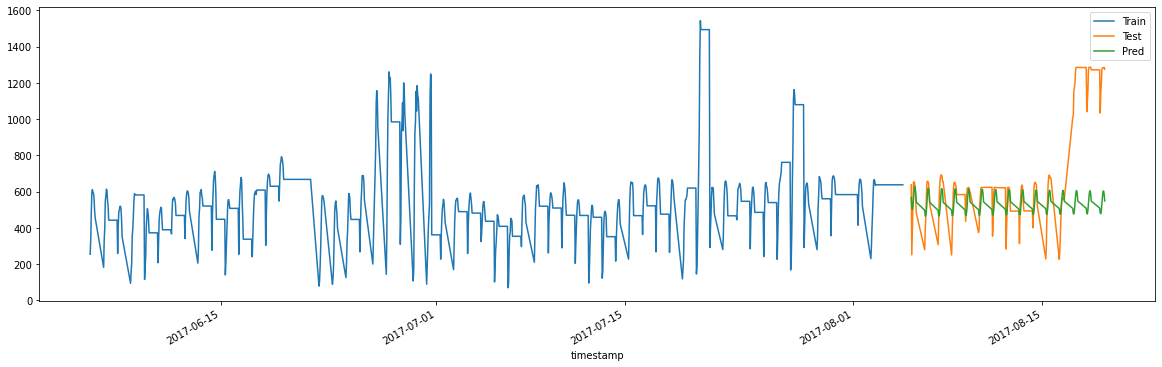

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 1180.0012143653394 
Day, 1 Hour 8 :00 1121.530408458135 
Day, 1 Hour 9 :00 1107.3412481457885 
Day, 1 Hour 10 :00 1123.9315584384149 
Day, 1 Hour 11 :00 1154.3664348366626 
Day, 1 Hour 12 :00 1180.2010948375848 
Day, 1 Hour 13 :00 1186.500018043116 
Day, 1 Hour 14 :00 1166.6128624101145 
Day, 1 Hour 15 :00 1124.26750728824 
Day, 1 Hour 16 :00 1071.9227124258848 
Day, 2 Hour 7 :00 1025.9051677202735 
Day, 2 Hour 8 :00 1000.1439567714976 
Day, 2 Hour 9 :00 1000.8692655916573 
Day, 2 Hour 10 :00 1024.2760254346933 
Day, 2 Hour 11 :00 1058.02063014822 
Day, 2 Hour 12 :00 1085.958910064284 
Day, 2 Hour 13 :00 1094.305045791438 
Day, 2 Hour 14 :00 1076.8608922971373 
Day, 2 Hour 15 :00 1037.3315439280138 
Day, 2 Hour 16 :00 987.8619228437408 
Day, 3 Hour 7 :00 944.371170391136 
Day, 3 Hour 8 :00 920.4765054747309 
Day, 3 Hour 9 :00 922.3251349663999 
Day, 3 Hour 10 :00 946.2950301604931 
Day, 3 Hour 11 :00 980.4237313992312 
Day, 3 Hour 12 :00 1009.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [167]:
#2813 total capacity
model_0 = ARIMA(train_dictionary[0].usage,order=(4,0,4)).fit()
pred = model_0.predict(start=len(dataframe_dictionary["municipality-0"])-len(test_dictionary[0]),end=len(dataframe_dictionary["municipality-0"])-1)
residuals = list(test_dictionary[0].usage)-pred
print("tfd",test_dictionary[0].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[0].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-0"].index[dataframe_dictionary["municipality-1"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[0].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[0].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_0_final = ARIMA(dataframe_dictionary["municipality-0"].usage,order=(4,0,4)).fit()
pred_future = model_0_final.predict(start=len(dataframe_dictionary["municipality-0"]),end=len(dataframe_dictionary["municipality-0"])+69)
print("PREDICTION OF NEXT WEEK")
cons=760
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>2813:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1
    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    358
2017-08-05 08:00:00    158
2017-08-05 09:00:00    216
2017-08-05 10:00:00    300
2017-08-05 11:00:00    397
                      ... 
2017-08-19 12:00:00    406
2017-08-19 13:00:00    408
2017-08-19 14:00:00    410
2017-08-19 15:00:00    411
2017-08-19 16:00:00    401
Name: usage, Length: 150, dtype: int64
pred 610    328.609611
611    304.965692
612    288.758661
613    282.253385
614    283.073413
          ...    
755    297.393453
756    297.393453
757    297.393453
758    297.393453
759    297.393453
Length: 150, dtype: float64
res 610     29.390389
611   -146.965692
612    -72.758661
613     17.746615
614    113.926587
          ...    
755    108.606547
756    110.606547
757    112.606547
758    113.606547
759    103.606547
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.2839


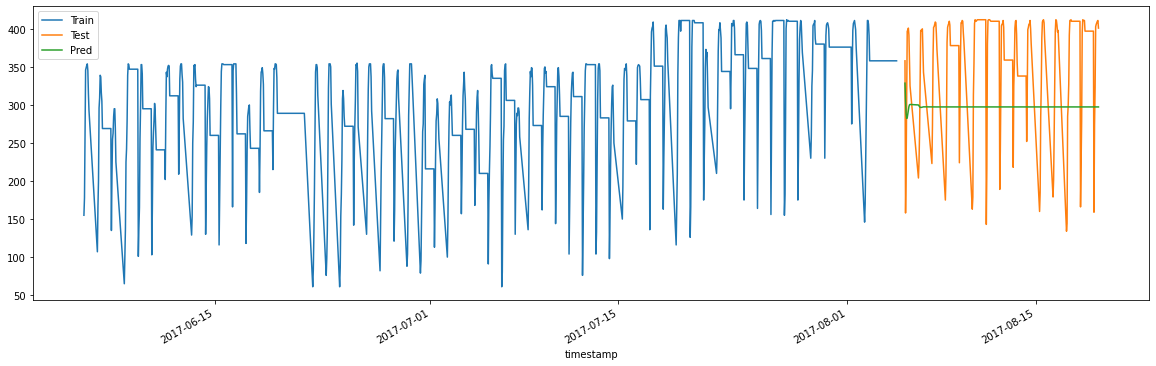

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 353.8492560626308 
Day, 1 Hour 8 :00 316.825236875107 
Day, 1 Hour 9 :00 293.8467951268295 
Day, 1 Hour 10 :00 285.87552384793304 
Day, 1 Hour 11 :00 288.283501537402 
Day, 1 Hour 12 :00 295.5160220189131 
Day, 1 Hour 13 :00 303.1112398648487 
Day, 1 Hour 14 :00 308.57629660829343 
Day, 1 Hour 15 :00 311.23024941088465 
Day, 1 Hour 16 :00 311.5695491728144 
Day, 2 Hour 7 :00 310.5678941803253 
Day, 2 Hour 8 :00 309.15608484778573 
Day, 2 Hour 9 :00 307.9571293380148 
Day, 2 Hour 10 :00 307.23886548215 
Day, 2 Hour 11 :00 306.9973340826628 
Day, 2 Hour 12 :00 307.08452017045255 
Day, 2 Hour 13 :00 307.32071363950524 
Day, 2 Hour 14 :00 307.5642626393438 
Day, 2 Hour 15 :00 307.73720737143714 
Day, 2 Hour 16 :00 307.81948831881834 
Day, 3 Hour 7 :00 307.8281309510857 
Day, 3 Hour 8 :00 307.794771100344 
Day, 3 Hour 9 :00 307.7491715945802 
Day, 3 Hour 10 :00 307.7109855996381 
Day, 3 Hour 11 :00 307.6884483241492 
Day, 3 Hour 12 :00 307.681172118

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [171]:
model_1 = ARIMA(train_dictionary[1].usage,order=(3,0,1)).fit()
pred = model_1.predict(start=len(dataframe_dictionary["municipality-1"])-len(test_dictionary[1]),end=len(dataframe_dictionary["municipality-1"])-1)
residuals = list(test_dictionary[1].usage)-pred
print("tfd",test_dictionary[1].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[1].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-1"].index[dataframe_dictionary["municipality-1"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[1].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[1].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_1_final = ARIMA(dataframe_dictionary["municipality-1"].usage,order=(3,0,1)).fit()
pred_future = model_1_final.predict(start=len(dataframe_dictionary["municipality-1"]),end=len(dataframe_dictionary["municipality-1"])+69)
print("PREDICTION OF NEXT WEEK")
cons=760
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>397:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    553
2017-08-05 08:00:00    327
2017-08-05 09:00:00    405
2017-08-05 10:00:00    483
2017-08-05 11:00:00    567
                      ... 
2017-08-19 12:00:00    663
2017-08-19 13:00:00    697
2017-08-19 14:00:00    687
2017-08-19 15:00:00    651
2017-08-19 16:00:00    580
Name: usage, Length: 150, dtype: int64
pred 620    490.284021
621    444.529053
622    431.674565
623    452.815786
624    497.098786
          ...    
765    527.055348
766    566.466240
767    577.902393
768    557.010153
769    511.750718
Length: 150, dtype: float64
res 620     62.715979
621   -117.529053
622    -26.674565
623     30.184214
624     69.901214
          ...    
765    135.944652
766    130.533760
767    109.097607
768     93.989847
769     68.249282
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.1594


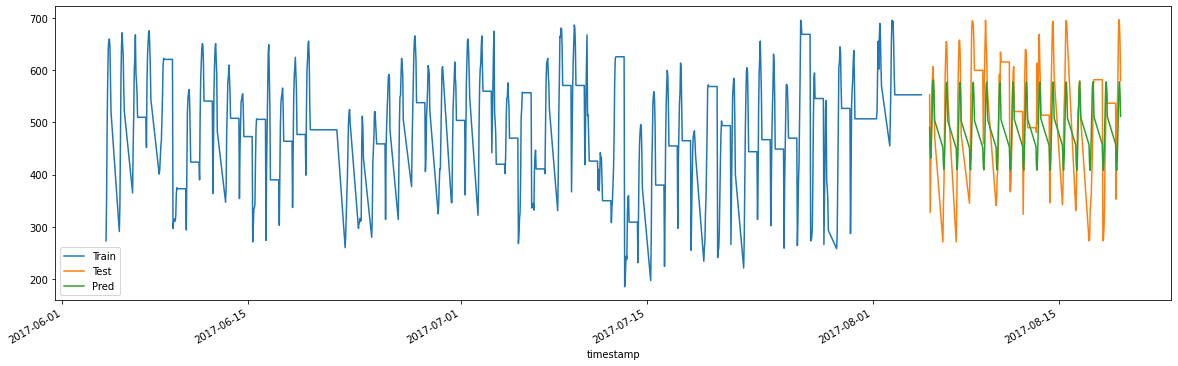

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 501.49900508542805 
Day, 1 Hour 8 :00 448.09821900807566 
Day, 1 Hour 9 :00 433.16998670653726 
Day, 1 Hour 10 :00 457.0006793953953 
Day, 1 Hour 11 :00 506.6214566503087 
Day, 1 Hour 12 :00 560.3243349598127 
Day, 1 Hour 13 :00 595.6310751397908 
Day, 1 Hour 14 :00 597.6423518861601 
Day, 1 Hour 15 :00 564.5593632708247 
Day, 1 Hour 16 :00 508.25511535454973 
Day, 2 Hour 7 :00 449.6650863027178 
Day, 2 Hour 8 :00 410.7458000953476 
Day, 2 Hour 9 :00 406.06092767768655 
Day, 2 Hour 10 :00 437.1982945923801 
Day, 2 Hour 11 :00 492.1430325022229 
Day, 2 Hour 12 :00 549.8433218430818 
Day, 2 Hour 13 :00 588.2260187831146 
Day, 2 Hour 14 :00 592.6046297077837 
Day, 2 Hour 15 :00 561.2729424412997 
Day, 2 Hour 16 :00 506.1510193834739 
Day, 3 Hour 7 :00 448.236932287845 
Day, 3 Hour 8 :00 409.59821805874265 
Day, 3 Hour 9 :00 404.9564099184249 
Day, 3 Hour 10 :00 436.07312801655587 
Day, 3 Hour 11 :00 491.0779917035343 
Day, 3 Hour 12 :00 548.994374

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [172]:
model_2 = ARIMA(train_dictionary[2].usage,order=(3,0,3)).fit()
pred = model_2.predict(start=len(dataframe_dictionary["municipality-2"])-len(test),end=len(dataframe_dictionary["municipality-2"])-1)
residuals = list(test_dictionary[2].usage)-pred
print("tfd",test_dictionary[2].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[2].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-2"].index[dataframe_dictionary["municipality-2"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[2].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[2].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_2_final = ARIMA(dataframe_dictionary["municipality-2"].usage,order=(3,0,3)).fit()
pred_future = model_2_final.predict(start=len(dataframe_dictionary["municipality-2"]),end=len(dataframe_dictionary["municipality-2"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>697:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00     952
2017-08-05 08:00:00     781
2017-08-05 09:00:00    1121
2017-08-05 10:00:00    1289
2017-08-05 11:00:00    1557
                       ... 
2017-08-19 12:00:00    1484
2017-08-19 13:00:00    1519
2017-08-19 14:00:00    1530
2017-08-19 15:00:00    1496
2017-08-19 16:00:00    1330
Name: usage, Length: 150, dtype: int64
pred 620     840.320894
621     799.679563
622     845.914803
623     965.647129
624    1116.744927
          ...     
765    1263.733588
766    1323.809303
767    1296.239211
768    1191.552063
769    1049.693310
Length: 150, dtype: float64
res 620    111.679106
621    -18.679563
622    275.085197
623    323.352871
624    440.255073
          ...    
765    220.266412
766    195.190697
767    233.760789
768    304.447937
769    280.306690
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.2805


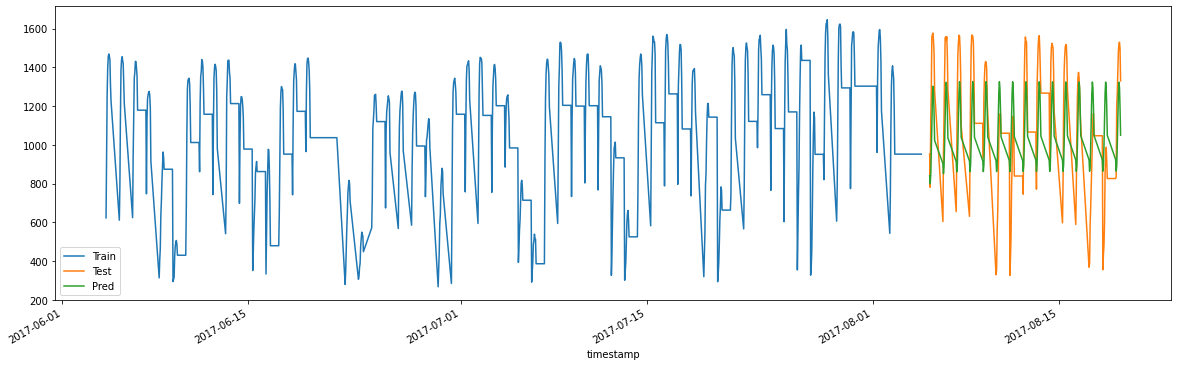

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 1176.138891800323 
Day, 1 Hour 8 :00 1112.1162653227914 
Day, 1 Hour 9 :00 1139.0244176752994 
Day, 1 Hour 10 :00 1228.914803419222 
Day, 1 Hour 11 :00 1333.1594187685553 
Day, 1 Hour 12 :00 1400.4249861311298 
Day, 1 Hour 13 :00 1395.7801831286433 
Day, 1 Hour 14 :00 1313.6063966775391 
Day, 1 Hour 15 :00 1179.3657671054798 
Day, 1 Hour 16 :00 1039.5503291250561 
Day, 2 Hour 7 :00 943.6580954234289 
Day, 2 Hour 8 :00 925.0870586132005 
Day, 2 Hour 9 :00 988.2443217096411 
Day, 2 Hour 10 :00 1106.7832814756475 
Day, 2 Hour 11 :00 1233.622315421021 
Day, 2 Hour 12 :00 1318.894689834931 
Day, 2 Hour 13 :00 1328.9534911411406 
Day, 2 Hour 14 :00 1259.1620718979284 
Day, 2 Hour 15 :00 1135.5866067166617 
Day, 2 Hour 16 :00 1004.9569551646723 
Day, 3 Hour 7 :00 916.7480672704678 
Day, 3 Hour 8 :00 904.2414018004506 
Day, 3 Hour 9 :00 971.8066652131356 
Day, 3 Hour 10 :00 1093.2566099401934 
Day, 3 Hour 11 :00 1221.8881496254792 
Day, 3 Hour 12 :00 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [173]:
model_3 = ARIMA(train_dictionary[3].usage,order=(3,0,3)).fit()
pred = model_3.predict(start=len(dataframe_dictionary["municipality-3"])-len(test),end=len(dataframe_dictionary["municipality-3"])-1)
residuals = list(test_dictionary[3].usage)-pred
print("tfd",test_dictionary[3].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[3].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-3"].index[dataframe_dictionary["municipality-3"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[3].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[3].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_3_final = ARIMA(dataframe_dictionary["municipality-3"].usage,order=(3,0,3)).fit()
pred_future = model_3_final.predict(start=len(dataframe_dictionary["municipality-3"]),end=len(dataframe_dictionary["municipality-3"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>1930:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    2152
2017-08-05 08:00:00    2132
2017-08-05 09:00:00    2814
2017-08-05 10:00:00    3123
2017-08-05 11:00:00    3447
                       ... 
2017-08-19 12:00:00    3157
2017-08-19 13:00:00    3194
2017-08-19 14:00:00    3183
2017-08-19 15:00:00    3111
2017-08-19 16:00:00    2779
Name: usage, Length: 150, dtype: int64
pred 620    1872.220847
621    1831.979357
622    2033.378943
623    2381.074696
624    2706.698499
          ...     
765    2841.586556
766    2795.279645
767    2569.651566
768    2251.147222
769    1961.582889
Length: 150, dtype: float64
res 620    279.779153
621    300.020643
622    780.621057
623    741.925304
624    740.301501
          ...    
765    315.413444
766    398.720355
767    613.348434
768    859.852778
769    817.417111
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.3051


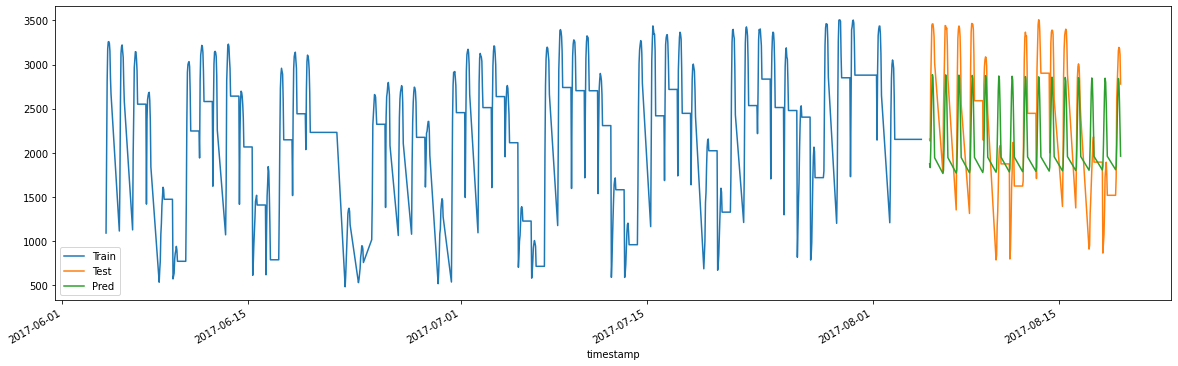

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 2465.443914317929 
Day, 1 Hour 8 :00 2345.079702109233 
Day, 1 Hour 9 :00 2434.0534912886933 
Day, 1 Hour 10 :00 2660.024683459579 
Day, 1 Hour 11 :00 2917.8002108642772 
Day, 1 Hour 12 :00 3097.9972475064105 
Day, 1 Hour 13 :00 3121.8515370007244 
Day, 1 Hour 14 :00 2971.14566919302 
Day, 1 Hour 15 :00 2695.00563478859 
Day, 1 Hour 16 :00 2391.0068103465474 
Day, 2 Hour 7 :00 2167.833004411119 
Day, 2 Hour 8 :00 2103.7575095092575 
Day, 2 Hour 9 :00 2216.787779731671 
Day, 2 Hour 10 :00 2457.843535732184 
Day, 2 Hour 11 :00 2729.5362445656137 
Day, 2 Hour 12 :00 2923.3495059810266 
Day, 2 Hour 13 :00 2961.012108490171 
Day, 2 Hour 14 :00 2824.2772046559066 
Day, 2 Hour 15 :00 2561.7662344989076 
Day, 2 Hour 16 :00 2270.300633630278 
Day, 3 Hour 7 :00 2057.878822268498 
Day, 3 Hour 8 :00 2002.4462202676473 
Day, 3 Hour 9 :00 2122.1899230057616 
Day, 3 Hour 10 :00 2368.6710042528393 
Day, 3 Hour 11 :00 2645.380308058885 
Day, 3 Hour 12 :00 2844.

In [175]:
model_4 = ARIMA(train_dictionary[4].usage,order=(3,0,5)).fit()
pred = model_4.predict(start=len(dataframe_dictionary["municipality-4"])-len(test),end=len(dataframe_dictionary["municipality-4"])-1)
residuals = list(test_dictionary[4].usage)-pred
print("tfd",test_dictionary[4].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[4].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-4"].index[dataframe_dictionary["municipality-4"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[4].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[4].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_4_final = ARIMA(dataframe_dictionary["municipality-4"].usage,order=(3,0,5)).fit()
pred_future = model_4_final.predict(start=len(dataframe_dictionary["municipality-4"]),end=len(dataframe_dictionary["municipality-4"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>3893:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    114
2017-08-05 08:00:00     23
2017-08-05 09:00:00     48
2017-08-05 10:00:00     96
2017-08-05 11:00:00    157
                      ... 
2017-08-19 12:00:00    258
2017-08-19 13:00:00    300
2017-08-19 14:00:00    318
2017-08-19 15:00:00    309
2017-08-19 16:00:00    239
Name: usage, Length: 150, dtype: int64
pred 620     87.721352
621     70.931489
622     77.932794
623    110.395544
624    159.097612
          ...    
765    213.156859
766    244.490419
767    249.382479
768    225.967255
769    183.177072
Length: 150, dtype: float64
res 620    26.278648
621   -47.931489
622   -29.932794
623   -14.395544
624    -2.097612
         ...    
765    44.843141
766    55.509581
767    68.617521
768    83.032745
769    55.822928
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.8666


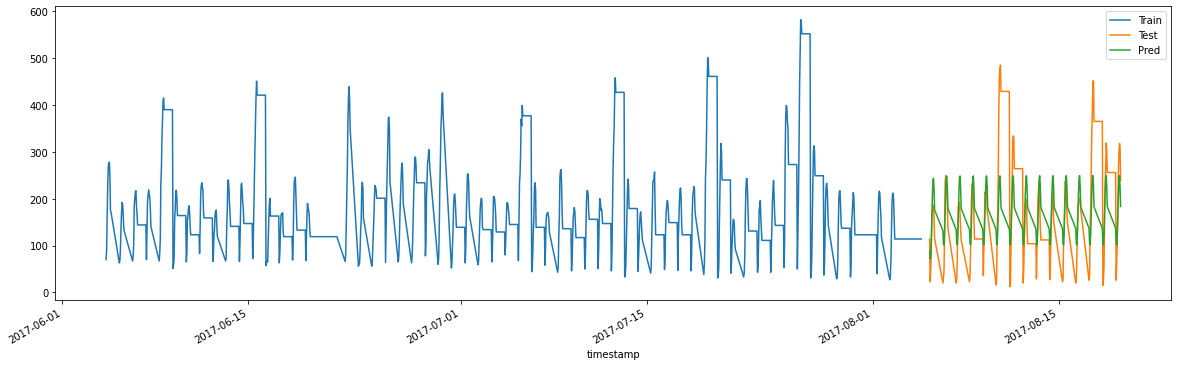

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 169.34392709683942 
Day, 1 Hour 8 :00 122.13697957600084 
Day, 1 Hour 9 :00 109.6127907556769 
Day, 1 Hour 10 :00 132.41886683310108 
Day, 1 Hour 11 :00 178.88194257527775 
Day, 1 Hour 12 :00 229.13558216670017 
Day, 1 Hour 13 :00 262.470714952547 
Day, 1 Hour 14 :00 265.0742812862378 
Day, 1 Hour 15 :00 235.18112458435664 
Day, 1 Hour 16 :00 183.658248870628 
Day, 2 Hour 7 :00 129.78933670959188 
Day, 2 Hour 8 :00 93.86338932158051 
Day, 2 Hour 9 :00 89.39361338651133 
Day, 2 Hour 10 :00 117.9347764948387 
Day, 2 Hour 11 :00 168.47528927407822 
Day, 2 Hour 12 :00 221.6334370405658 
Day, 2 Hour 13 :00 257.05286120459203 
Day, 2 Hour 14 :00 261.17122308558504 
Day, 2 Hour 15 :00 232.39428168012174 
Day, 2 Hour 16 :00 181.69931936935077 
Day, 3 Hour 7 :00 128.43800304044353 
Day, 3 Hour 8 :00 92.94234779147092 
Day, 3 Hour 9 :00 88.75816809706103 
Day, 3 Hour 10 :00 117.47216789118212 
Day, 3 Hour 11 :00 168.107710434043 
Day, 3 Hour 12 :00 221.3

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [176]:
model_5 = ARIMA(train_dictionary[5].usage,order=(3,0,3)).fit()
pred = model_5.predict(start=len(dataframe_dictionary["municipality-5"])-len(test),end=len(dataframe_dictionary["municipality-5"])-1)
residuals = list(test_dictionary[5].usage)-pred
print("tfd",test_dictionary[5].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[5].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-5"].index[dataframe_dictionary["municipality-5"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[5].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[5].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_5_final = ARIMA(dataframe_dictionary["municipality-5"].usage,order=(3,0,3)).fit()
pred_future = model_5_final.predict(start=len(dataframe_dictionary["municipality-5"]),end=len(dataframe_dictionary["municipality-5"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>587:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    1018
2017-08-05 08:00:00     571
2017-08-05 09:00:00     755
2017-08-05 10:00:00     903
2017-08-05 11:00:00    1057
                       ... 
2017-08-19 12:00:00    1787
2017-08-19 13:00:00    1845
2017-08-19 14:00:00    1853
2017-08-19 15:00:00    1829
2017-08-19 16:00:00    1727
Name: usage, Length: 150, dtype: int64
pred 620     923.423803
621     844.984884
622     821.340271
623     865.207448
624     962.733997
          ...     
765    1054.120940
766    1155.075574
767    1208.410562
768    1193.849825
769    1116.936190
Length: 150, dtype: float64
res 620     94.576197
621   -273.984884
622    -66.340271
623     37.792552
624     94.266003
          ...    
765    732.879060
766    689.924426
767    644.589438
768    635.150175
769    610.063810
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.1813


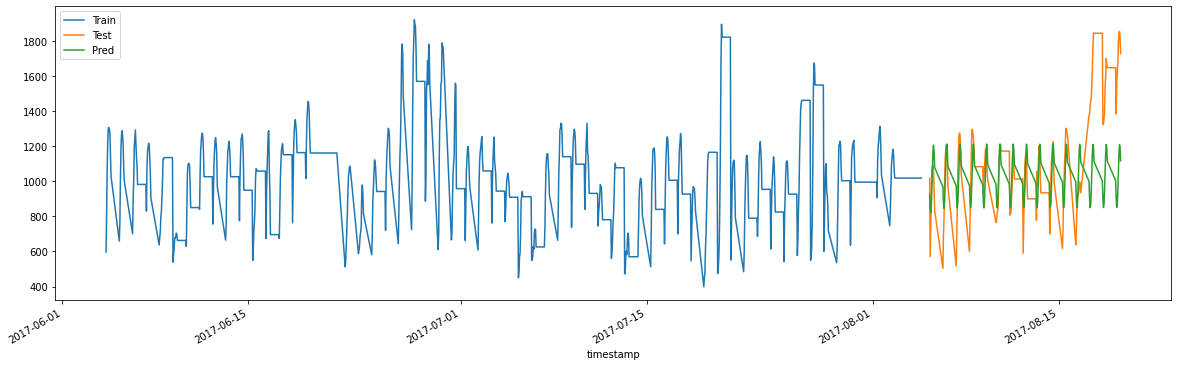

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 1497.3725254534224 
Day, 1 Hour 8 :00 1321.038451151596 
Day, 1 Hour 9 :00 1224.1570585576949 
Day, 1 Hour 10 :00 1208.108625001427 
Day, 1 Hour 11 :00 1250.4314255403037 
Day, 1 Hour 12 :00 1312.020931886454 
Day, 1 Hour 13 :00 1350.9345350045314 
Day, 1 Hour 14 :00 1337.4898979018487 
Day, 1 Hour 15 :00 1264.8631028746886 
Day, 1 Hour 16 :00 1151.1160531824091 
Day, 2 Hour 7 :00 1031.8547436382357 
Day, 2 Hour 8 :00 946.2946135004267 
Day, 2 Hour 9 :00 922.0247019295934 
Day, 2 Hour 10 :00 964.2607895503752 
Day, 2 Hour 11 :00 1053.6696553071133 
Day, 2 Hour 12 :00 1153.5831012984831 
Day, 2 Hour 13 :00 1223.8450290969856 
Day, 2 Hour 14 :00 1236.0097581250957 
Day, 2 Hour 15 :00 1184.0968362663677 
Day, 2 Hour 16 :00 1086.8020133258601 
Day, 3 Hour 7 :00 980.3201033099726 
Day, 3 Hour 8 :00 904.5125899972743 
Day, 3 Hour 9 :00 887.6883053416818 
Day, 3 Hour 10 :00 935.7935908674526 
Day, 3 Hour 11 :00 1030.1281353489794 
Day, 3 Hour 12 :00 1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [177]:
model_6 = ARIMA(train_dictionary[6].usage,order=(3,0,3)).fit()
pred = model_6.predict(start=len(dataframe_dictionary["municipality-6"])-len(test),end=len(dataframe_dictionary["municipality-6"])-1)
residuals = list(test_dictionary[6].usage)-pred
print("tfd",test_dictionary[6].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[6].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-6"].index[dataframe_dictionary["municipality-6"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[6].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[6].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_6_final = ARIMA(dataframe_dictionary["municipality-6"].usage,order=(3,0,3)).fit()
pred_future = model_6_final.predict(start=len(dataframe_dictionary["municipality-6"]),end=len(dataframe_dictionary["municipality-6"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>3113:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    1169
2017-08-05 08:00:00     651
2017-08-05 09:00:00     820
2017-08-05 10:00:00    1038
2017-08-05 11:00:00    1319
                       ... 
2017-08-19 12:00:00    1503
2017-08-19 13:00:00    1627
2017-08-19 14:00:00    1657
2017-08-19 15:00:00    1618
2017-08-19 16:00:00    1450
Name: usage, Length: 150, dtype: int64
pred 620    1034.977861
621     939.808562
622     924.684111
623     996.313303
624    1127.986780
          ...     
765    1245.483596
766    1355.100002
767    1388.994101
768    1334.255487
769    1211.740692
Length: 150, dtype: float64
res 620    134.022139
621   -288.808562
622   -104.684111
623     41.686697
624    191.013220
          ...    
765    257.516404
766    271.899998
767    268.005899
768    283.744513
769    238.259308
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.1496


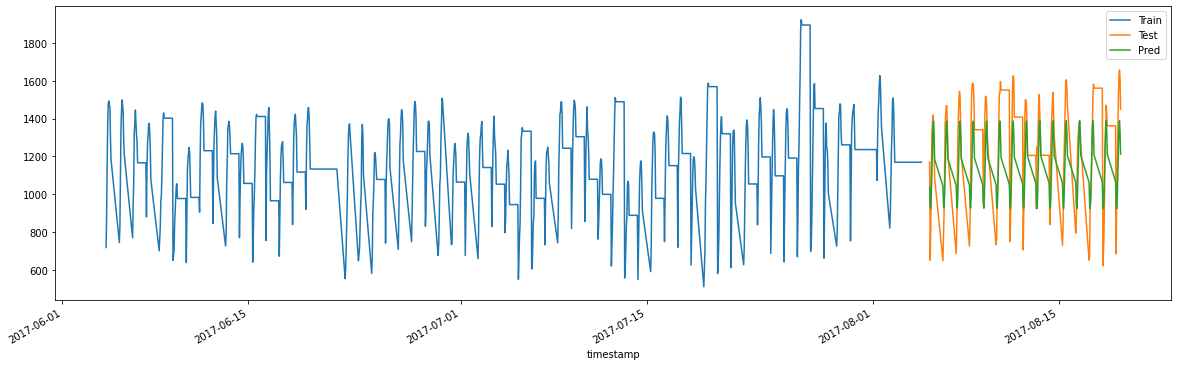

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 1185.2565431390358 
Day, 1 Hour 8 :00 1014.7977254726649 
Day, 1 Hour 9 :00 965.730395840834 
Day, 1 Hour 10 :00 1031.4900712579156 
Day, 1 Hour 11 :00 1172.265620342173 
Day, 1 Hour 12 :00 1325.7825921708782 
Day, 1 Hour 13 :00 1428.491036919645 
Day, 1 Hour 14 :00 1438.3091594789644 
Day, 1 Hour 15 :00 1349.8014090198922 
Day, 1 Hour 16 :00 1195.7421725360323 
Day, 2 Hour 7 :00 1034.3178036224363 
Day, 2 Hour 8 :00 926.7606204441294 
Day, 2 Hour 9 :00 913.894361609577 
Day, 2 Hour 10 :00 1000.5067471187004 
Day, 2 Hour 11 :00 1153.4915207503245 
Day, 2 Hour 12 :00 1314.457603279494 
Day, 2 Hour 13 :00 1421.9894284648303 
Day, 2 Hour 14 :00 1435.064327083223 
Day, 2 Hour 15 :00 1348.6934706815296 
Day, 2 Hour 16 :00 1195.8201955679747 
Day, 3 Hour 7 :00 1034.7518149228963 
Day, 3 Hour 8 :00 926.9188925484367 
Day, 3 Hour 9 :00 913.4449469662121 
Day, 3 Hour 10 :00 999.4628519750323 
Day, 3 Hour 11 :00 1152.15913193481 
Day, 3 Hour 12 :00 1313.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [178]:
model_7 = ARIMA(train_dictionary[7].usage,order=(3,0,3)).fit()
pred = model_7.predict(start=len(dataframe_dictionary["municipality-7"])-len(test),end=len(dataframe_dictionary["municipality-7"])-1)
residuals = list(test_dictionary[7].usage)-pred
print("tfd",test_dictionary[7].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[7].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-7"].index[dataframe_dictionary["municipality-7"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[7].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[7].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_7_final = ARIMA(dataframe_dictionary["municipality-7"].usage,order=(3,0,3)).fit()
pred_future = model_7_final.predict(start=len(dataframe_dictionary["municipality-7"]),end=len(dataframe_dictionary["municipality-7"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>2019:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    1035
2017-08-05 08:00:00     572
2017-08-05 09:00:00     847
2017-08-05 10:00:00    1059
2017-08-05 11:00:00    1249
                       ... 
2017-08-19 12:00:00    1251
2017-08-19 13:00:00    1315
2017-08-19 14:00:00    1341
2017-08-19 15:00:00    1336
2017-08-19 16:00:00    1253
Name: usage, Length: 150, dtype: int64
pred 620     908.104938
621     855.553288
622     876.283667
623     962.782129
624    1082.373569
          ...     
765    1183.842067
766    1242.926382
767    1229.769818
768    1149.399000
769    1032.482496
Length: 150, dtype: float64
res 620    126.895062
621   -283.553288
622    -29.283667
623     96.217871
624    166.626431
          ...    
765     67.157933
766     72.073618
767    111.230182
768    186.601000
769    220.517504
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.2856


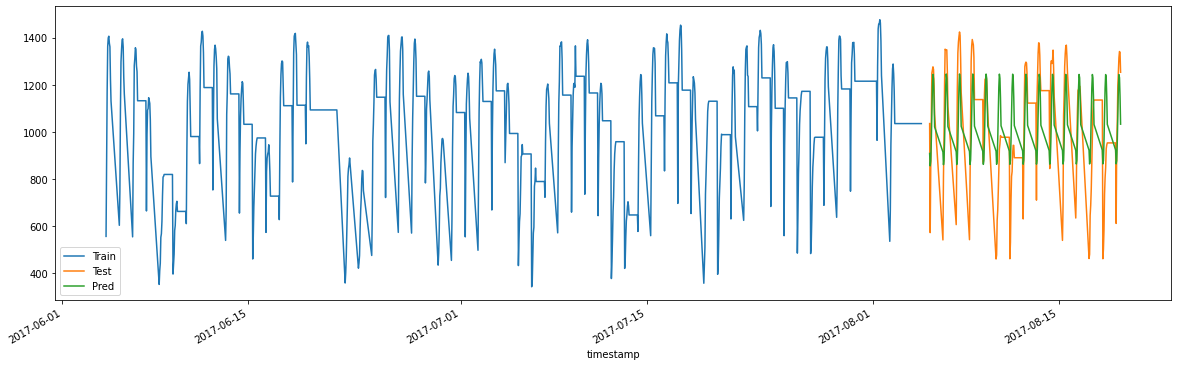

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 1082.163289538141 
Day, 1 Hour 8 :00 992.0788703989335 
Day, 1 Hour 9 :00 984.3804708596282 
Day, 1 Hour 10 :00 1051.4840387462184 
Day, 1 Hour 11 :00 1159.1634479421439 
Day, 1 Hour 12 :00 1259.2681005776478 
Day, 1 Hour 13 :00 1307.8146930613527 
Day, 1 Hour 14 :00 1281.5387980388807 
Day, 1 Hour 15 :00 1186.5819058401694 
Day, 1 Hour 16 :00 1055.9922367019306 
Day, 2 Hour 7 :00 936.987261914943 
Day, 2 Hour 8 :00 872.8333716422737 
Day, 2 Hour 9 :00 886.2526482827946 
Day, 2 Hour 10 :00 970.6844626741824 
Day, 2 Hour 11 :00 1092.7329118196844 
Day, 2 Hour 12 :00 1204.8634907525282 
Day, 2 Hour 13 :00 1263.502234478265 
Day, 2 Hour 14 :00 1245.6298042622818 
Day, 2 Hour 15 :00 1157.5378408299596 
Day, 2 Hour 16 :00 1032.4059211595713 
Day, 3 Hour 7 :00 917.6233079830258 
Day, 3 Hour 8 :00 856.6926787953496 
Day, 3 Hour 9 :00 872.620176619499 
Day, 3 Hour 10 :00 959.1288015788302 
Day, 3 Hour 11 :00 1083.0469483774439 
Day, 3 Hour 12 :00 1196.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [179]:
model_8 = ARIMA(train_dictionary[8].usage,order=(3,0,3)).fit()
pred = model_8.predict(start=len(dataframe_dictionary["municipality-8"])-len(test),end=len(dataframe_dictionary["municipality-8"])-1)
residuals = list(test_dictionary[8].usage)-pred
print("tfd",test_dictionary[8].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[9].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-9"].index[dataframe_dictionary["municipality-9"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[8].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[8].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_8_final = ARIMA(dataframe_dictionary["municipality-8"].usage,order=(3,0,3)).fit()
pred_future = model_8_final.predict(start=len(dataframe_dictionary["municipality-8"]),end=len(dataframe_dictionary["municipality-8"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>2947:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


tfd timestamp
2017-08-05 07:00:00    625
2017-08-05 08:00:00    333
2017-08-05 09:00:00    424
2017-08-05 10:00:00    564
2017-08-05 11:00:00    761
                      ... 
2017-08-19 12:00:00    849
2017-08-19 13:00:00    941
2017-08-19 14:00:00    983
2017-08-19 15:00:00    976
2017-08-19 16:00:00    879
Name: usage, Length: 150, dtype: int64
pred 620    561.463982
621    514.645495
622    511.464251
623    559.226205
624    643.666062
          ...    
765    722.819813
766    793.636547
767    818.970514
768    789.175717
769    715.603688
Length: 150, dtype: float64
res 620     63.536018
621   -181.645495
622    -87.464251
623      4.773795
624    117.333938
          ...    
765    126.180187
766    147.363453
767    164.029486
768    186.824283
769    163.396312
Length: 150, dtype: float64
Mean Absolute Percent Error : 0.1658


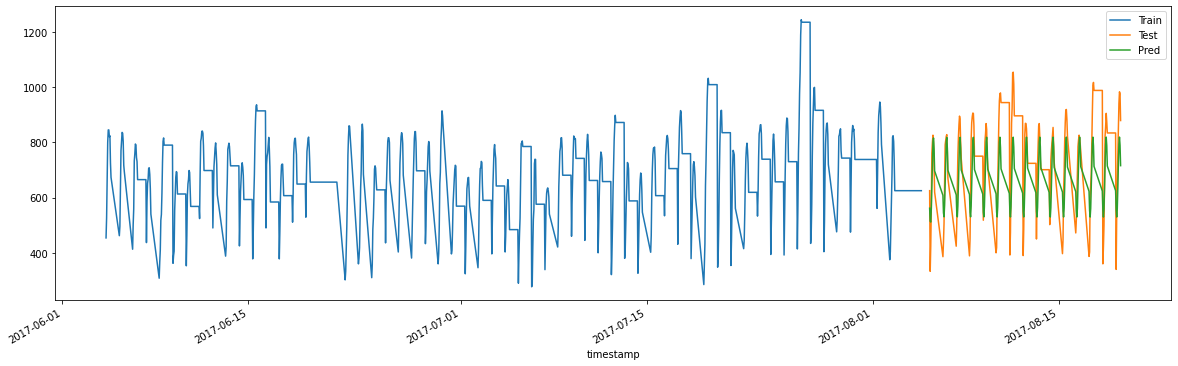

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


PREDICTION OF NEXT WEEK
Day, 1 Hour 7 :00 703.7195233104675 
Day, 1 Hour 8 :00 591.1575679718198 
Day, 1 Hour 9 :00 556.9506410978219 
Day, 1 Hour 10 :00 597.3374264758779 
Day, 1 Hour 11 :00 686.813788394741 
Day, 1 Hour 12 :00 785.1809567632969 
Day, 1 Hour 13 :00 851.272958269615 
Day, 1 Hour 14 :00 857.6957622505059 
Day, 1 Hour 15 :00 800.6968418159726 
Day, 1 Hour 16 :00 701.2454840567085 
Day, 2 Hour 7 :00 596.8199270284227 
Day, 2 Hour 8 :00 526.9802892799333 
Day, 2 Hour 9 :00 518.1991285434866 
Day, 2 Hour 10 :00 573.7174145550979 
Day, 2 Hour 11 :00 672.283623278351 
Day, 2 Hour 12 :00 776.2487325718835 
Day, 2 Hour 13 :00 845.9230721676776 
Day, 2 Hour 14 :00 854.7139363523983 
Day, 2 Hour 15 :00 799.2666803956214 
Day, 2 Hour 16 :00 700.7397230703253 
Day, 3 Hour 7 :00 596.7275005517832 
Day, 3 Hour 8 :00 526.9138915446937 
Day, 3 Hour 9 :00 517.9304777022036 
Day, 3 Hour 10 :00 573.1968090952149 
Day, 3 Hour 11 :00 671.6183536324108 
Day, 3 Hour 12 :00 775.6377988411272 


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [180]:
model_9 = ARIMA(train_dictionary[9].usage,order=(3,0,3)).fit()
pred = model_9.predict(start=len(dataframe_dictionary["municipality-9"])-len(test_dictionary[9]),end=len(dataframe_dictionary["municipality-9"])-1)
residuals = list(test_dictionary[9].usage)-pred
print("tfd",test_dictionary[9].usage)
print("pred",pred)
print("res",residuals)
print("Mean Absolute Percent Error :", round(np.mean(abs(residuals/list(test_dictionary[9].usage))),4))
test_df = pd.DataFrame(pred)
test_df['timestamp'] = dataframe_dictionary["municipality-9"].index[dataframe_dictionary["municipality-9"].index>='2017-08-05 07:00:00']
test_df.set_index('timestamp',inplace=True)
train_dictionary[9].usage.plot(legend=True,label="Train",figsize=(20,6))
test_dictionary[9].usage.plot(legend=True,label="Test")
test_df[0].plot(legend=True,label="Pred")
plt.show()
model_9_final = ARIMA(dataframe_dictionary["municipality-9"].usage,order=(3,0,3)).fit()
pred_future = model_9_final.predict(start=len(dataframe_dictionary["municipality-9"]),end=len(dataframe_dictionary["municipality-9"])+69)
print("PREDICTION OF NEXT WEEK")
cons=770
for x in range(1,8):
  for y in range(7,17):
    if pred_future[cons]>1332:
      print("****************\n")
      print("****************\n")
      print("****************\n")
      print("Day,",x,"Hour",y,":00",pred_future[cons],"Capacity might be exceeded")
      print("****************\n")
      print("****************\n")
      print("****************\n")
    else:
      print("\033[1m\033[91mDay,",x,"Hour",y,":00",pred_future[cons],"\033[0m")
      cons=cons+1